In [3]:
import pyLDAvis
import numpy as np
import pandas as pd
import re
import gensim
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Label
from bokeh.io import output_notebook
from pprint import pprint
import seaborn as sns
from sklearn.decomposition import PCA

/opt/homebrew/Caskroom/miniconda/base/envs/Funding-Landscape/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/Caskroom/miniconda/base/envs/Funding-Landscape/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/opt/homebrew/Caskroom/miniconda/base/envs/Funding-Landscape/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/homebrew/Caskroom/miniconda/base/envs/Funding-Landscape/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packagin

In [4]:
dictionary = gensim.corpora.Dictionary.load('../clean-data/fine-scale/UK/dictionary.dict')
corpus = gensim.corpora.MmCorpus('../clean-data/fine-scale/UK/corpus.mm')
lda = gensim.models.ldamulticore.LdaMulticore.load('../models/fine-scale/UK/model_101_topics')

In [5]:
#topics
N = len(corpus)
res = np.zeros((lda.num_topics, N))

for i in range(0,N):
    topic_probs = lda.get_document_topics(corpus[i])
    for j in topic_probs:
        res[j[0],i] = j[1]

In [6]:
#filter docs with no topics
no_topic_index = np.sum(res, axis = (0)) > 0.0

sum(no_topic_index)

47930

In [17]:
pca = PCA(n_components=101)
pca.fit(res[:,no_topic_index].transpose())

PCA(n_components=101)

<AxesSubplot:xlabel='PCA_axis', ylabel='explained_variance'>

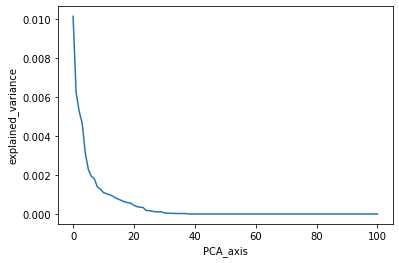

In [18]:
df_pca = pd.DataFrame({"explained_variance": pca.explained_variance_})

df_pca["PCA_axis"] = df_pca.index

sns.lineplot(x="PCA_axis",y="explained_variance", data=df_pca)

<AxesSubplot:xlabel='PCA_axis', ylabel='cumulative_variance'>

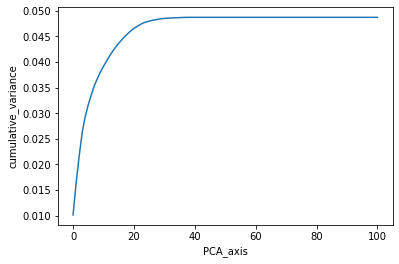

In [19]:
df_pca = df_pca.assign(cumulative_variance=df_pca['explained_variance'].cumsum())

sns.lineplot(x="PCA_axis",y="cumulative_variance", data=df_pca)